
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier, such as the number of neighbors (k) and the distance metric. Implement the following methods within this class. $\textit{fit(X_train, y_train):}$ This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal attributes of the class for later use in prediction. $\textit{predict(X_test):} This method should take test data (X_test) as input and return the predicted labels for the given data points using the KNN algorithm.

2. Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method. Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted labels with the actual (original) labels of the test data

3. Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels do not match their true labels.

4. Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

<b> Part(c): Parameter selection: What is good value for k? - </b> A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in the best performance on the validation set.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part (b).

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

2. Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed data. Examine the effect of changing the distance metric from $l_{2}$ to $l_{1}$ on the KNN performance for both Gaussian and Laplacian distributed datasets


<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> :

1. Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened to arrive at a 784 dimensional vector.
3. Use the most suitable distance metric and k to maximize the test data performance.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.



In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

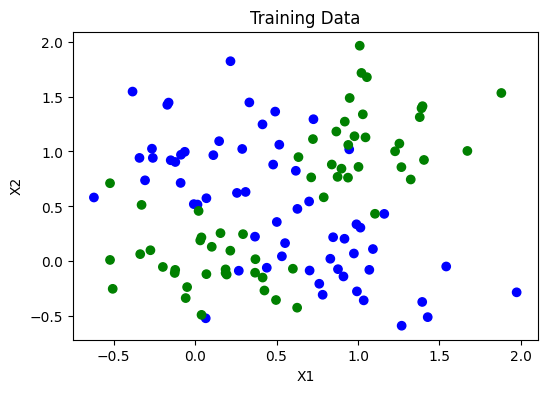

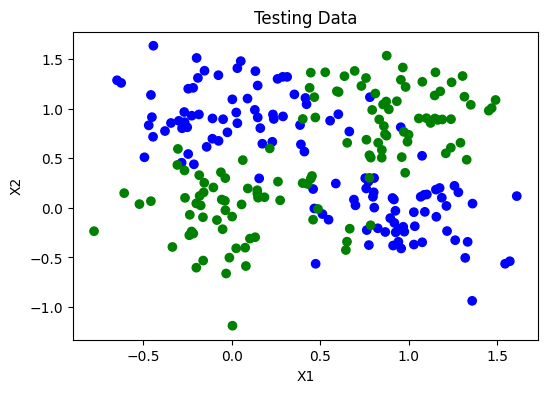

In [2]:
########################################
#Part(a) #Synthetic data generation
########################################
# Define means and covariances
mean1 = np.array([0, 0])
mean2 = np.array([0, 1])
mean3 = np.array([1, 0])
mean4 = np.array([1, 1])
cov = np.array([[0.1, 0], [0, 0.1]])

# Generate training data (30 samples per class)
train_samples_1 = np.random.multivariate_normal(mean1, cov, 30)
train_samples_2 = np.random.multivariate_normal(mean2, cov, 30)
train_samples_3 = np.random.multivariate_normal(mean3, cov, 30)
train_samples_4 = np.random.multivariate_normal(mean4, cov, 30)

# Generate testing data (60 samples per class)
test_samples_1 = np.random.multivariate_normal(mean1, cov, 60)
test_samples_2 = np.random.multivariate_normal(mean2, cov, 60)
test_samples_3 = np.random.multivariate_normal(mean3, cov, 60)
test_samples_4 = np.random.multivariate_normal(mean4, cov, 60)

# Concatenate training data
X_train = np.concatenate((train_samples_2, train_samples_3, train_samples_1, train_samples_4), axis=0)

# Concatenate testing data
X_test = np.concatenate((test_samples_2, test_samples_3, test_samples_1, test_samples_4), axis=0)

# Assign labels based on the order of concatenation
Y_train = np.concatenate((-np.ones(30), -np.ones(30), np.ones(30), np.ones(30)), axis=0)
Y_test = np.concatenate((-np.ones(60), -np.ones(60), np.ones(60), np.ones(60)), axis=0)

# Visualize the training data
cmap = ListedColormap(['blue', 'green'])

plt.figure(figsize=(6,4))

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap)
plt.title('Training Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Visualize the testing data
plt.figure(figsize=(6,4))

plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cmap)
plt.title('Testing Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()



KNN accuracy: 0.8583333333333333


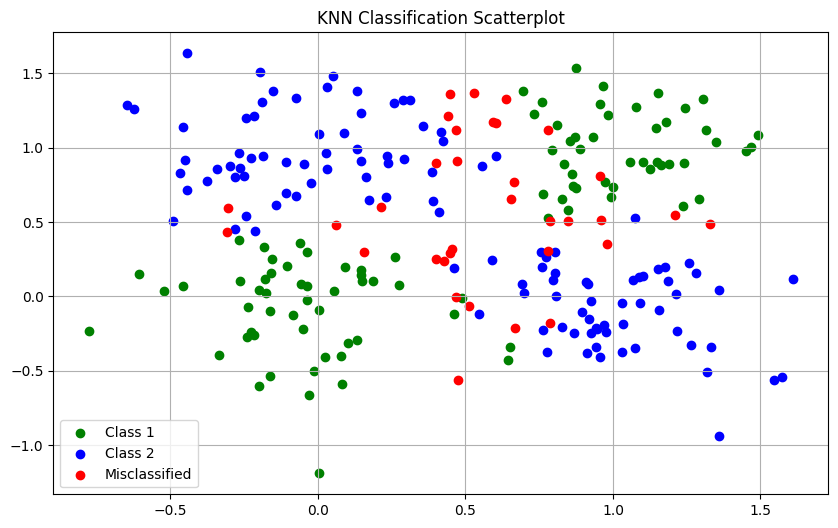

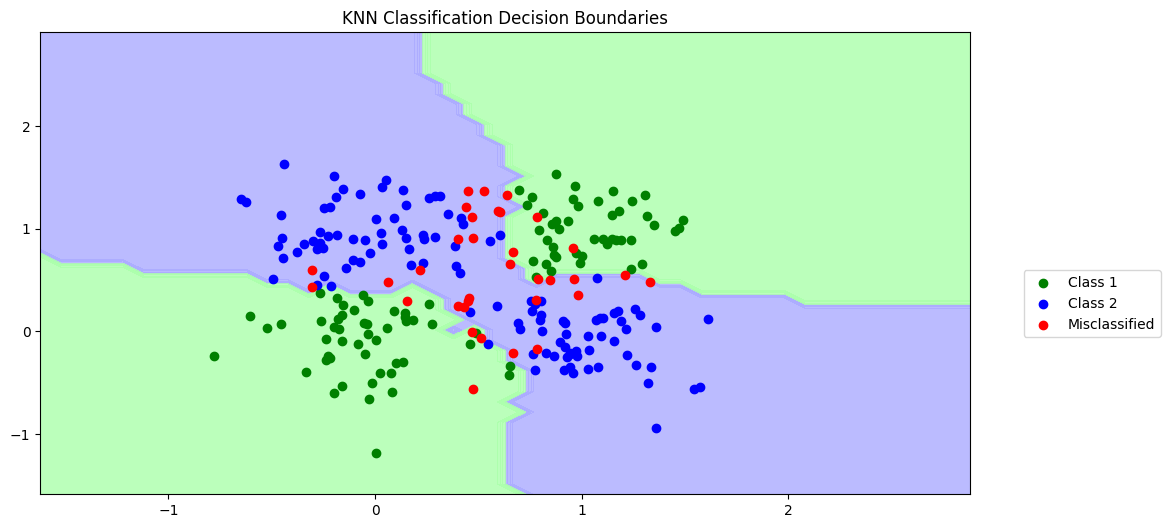

In [3]:
########################################

#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
class KNeighborsClassifier:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors=5,distance_metric="l2"):

        #Initializes the KNeighborsClassifier with the specified number of neighbors. Defaults to 1.
        #Default distance_metric is L2 norm

        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self,X_train,Y_train):
        #This method fits the k-nearest neighbors classifier from the training data. X_train is the training data, represented as a numpy array of shape (n_samples, n_features), and Y_train is the target values of the training data, represented as a numpy array of shape (n_samples,)
        self.X_train = np.array(X_train)
        self.y_train = np.array(Y_train)
        # return self


    def distance(self, x1, x2):
        # Calculate the distance between two points using the specified distance metric
        if self.distance_metric == "l2":
            return np.linalg.norm(x1 - x2)

        elif self.distance_metric == "l1":
            return np.sum(np.abs(x1 - x2))

        elif self.distance_metric == "chebyshev":
            return np.max(np.abs(x1 - x2))

        else:
            raise ValueError("Unsupported distance metric")


    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.array([self.distance(x, x_train) for x_train in self.X_train])
            nearest_neighbors = np.argsort(distances)[:self.n_neighbors]
            votes = self.y_train[nearest_neighbors]
            predicted_label = np.sign(np.sum(votes))
            predictions.append(predicted_label)
        return np.array(predictions)




classif = KNeighborsClassifier(n_neighbors=5,distance_metric="l2")
classif.fit(X_train,Y_train)

predictions = classif.predict(X_test)
#print(Y_test)
#print(predictions)
#print (predictions)
#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
    #Inputs : Ground truth and predicted labels
    #Outputs : Portion of data points that are correctly classified, i.e., accuracy
    accuracy = np.mean(true == pred)

    return accuracy

KNN_accuracy = KNNAccuracy(Y_test,predictions)
print("KNN accuracy:", KNN_accuracy)

#Create a visual representation of predictions

def plot_predictions(X_test,Y_test,predictions):

    plt.figure(figsize=(10,6))

    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    predictions = np.array(predictions)

    class_1 = (Y_test == 1) & (predictions == 1)
    class_2 = (Y_test == -1)&(predictions == -1)

    misfits = (Y_test != predictions)

    plt.scatter(X_test[class_1][:,0],X_test[class_1][:,1],color = 'green', label = 'Class 1')
    plt.scatter(X_test[class_2][:,0],X_test[class_2][:,1],color = 'blue', label = 'Class 2')
    plt.scatter(X_test[misfits][:,0],X_test[misfits][:,1],color = 'red', label = 'Misclassified')

    # print(f"There are {len(X_test[class_1])} green points")
    # print(f"There are {len(X_test[class_2])} blue points")
    # print(f"There are {len(X_test[misfits])} red points")

    plt.title('KNN Classification Scatterplot')
    plt.legend()
    plt.grid()
    plt.show()

plot_predictions(X_test,Y_test,predictions)


#Generate and visualize the decision regions and overlay the test points

def decision_boundaries(X_train,Y_train,X_test,Y_test,predictions):
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    predictions = np.array(predictions)

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    x_d,y_d =  np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

    graphd_points = np.c_[x_d.ravel(),y_d.ravel()] #ravel flattens the array
    C = classif.predict(graphd_points)
    C = np.array(C)
    C = C.reshape(x_d.shape) #reshape the array to the shape of x_d

    plt.figure(figsize=(12,6))
    cmap_light = ListedColormap(['#AAAAFF', '#AAFFAA'])
    plt.contourf(x_d, y_d, C, cmap=cmap_light, alpha=0.8)

    class_1 = (Y_test == 1) & (predictions == 1)
    class_2 = (Y_test == -1) & (predictions == -1)

    misfits = (Y_test != predictions)

    plt.scatter(X_test[class_1][:,0],X_test[class_1][:,1],color = 'green', label = 'Class 1')#Used yellow for color coding since green doesnt standout on blue
    plt.scatter(X_test[class_2][:,0],X_test[class_2][:,1],color = 'blue', label = 'Class 2')
    plt.scatter(X_test[misfits][:,0],X_test[misfits][:,1],color = 'red', label = 'Misclassified')

    plt.title('KNN Classification Decision Boundaries')
    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left')
    plt.show()


decision_boundaries(X_train,Y_train,X_test,Y_test,predictions)



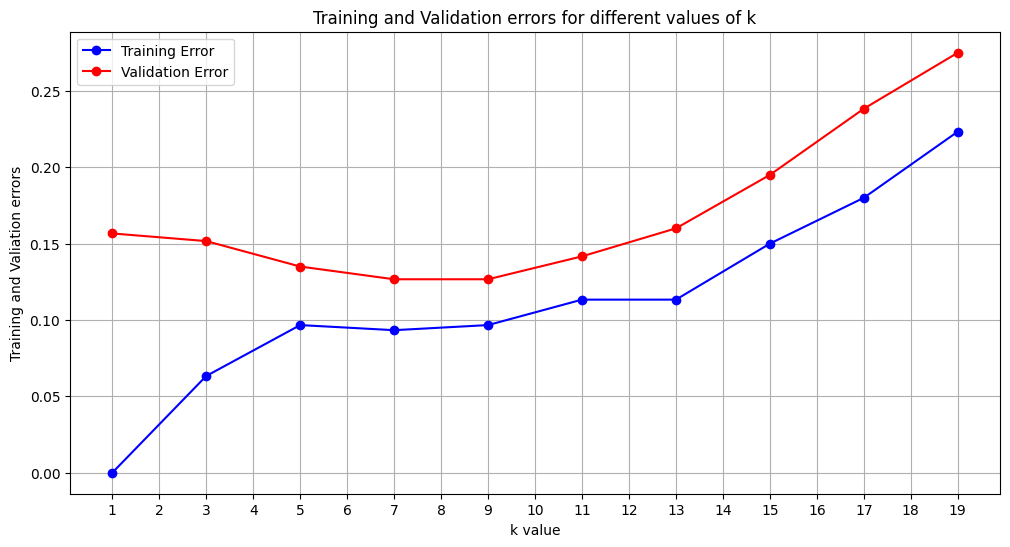

Best k: 7
Maximum accuracy on best k: 0.8733333333333333
KNN accuracy with best k on part (b): 0.85


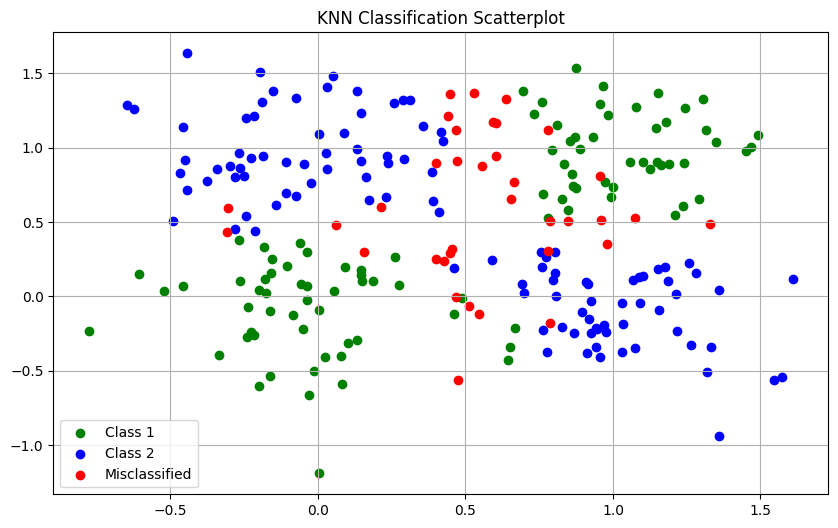

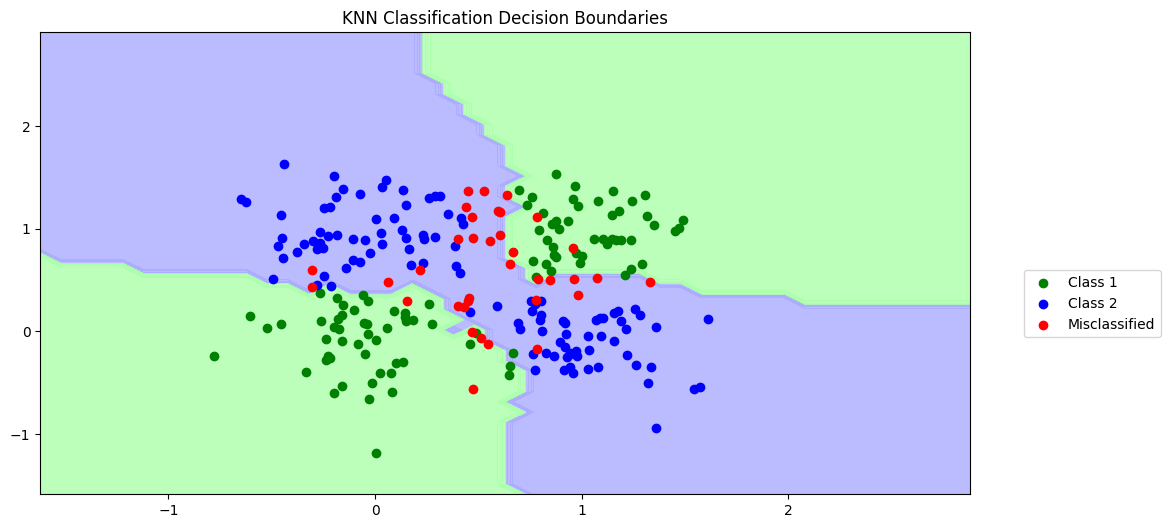

The accuracy of the model has decreased with the best k value


In [4]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,rho,no_of_iterations,X_train,Y_train):
  #Iterate through range of k values
    #Hold out rho fraction of training data in each repetition.
  val_errors = {k: [] for k in k_range}
  train_errors = {k: [] for k in k_range}

  for i in range(1, no_of_iterations+1):

      valid_samples_count = int(rho * len(X_train))
      train_samples_count = len(X_train) - valid_samples_count
      random_indices_1 = np.random.choice(90, size=30, replace=False)

      Train_samples = X_train[random_indices_1]

      other_indices = np.setdiff1d(np.arange(0, 90), random_indices_1)

      Valid_samples = X_train[other_indices]

      Train_labels = Y_train[random_indices_1]
      Valid_labels = Y_train[other_indices]




      for k in k_range:
          classif_cv = KNeighborsClassifier(k)
          classif_cv.fit(Train_samples,Train_labels)

          predictions_cv = classif_cv.predict(Valid_samples)
          accuracy_cv = KNNAccuracy(Valid_labels,predictions_cv)
          error_perc_cv = 1-accuracy_cv

          predictions_train = classif_cv.predict(Train_samples)
          accuracy_train = KNNAccuracy(Train_labels,predictions_train)
          error_perc_train = 1-accuracy_train

          val_errors[k].append(error_perc_cv)
          train_errors[k].append(error_perc_train)

  return val_errors, train_errors

  #Return errors on training and validation data

k_range = range(1, 21, 2)
rho = 0.3
no_of_iterations = 10
validation_errors, training_errors = holdoutCVkNN(k_range, rho, no_of_iterations, X_train, Y_train)

#Plot training and validation errors for different values of k

avg_errors_validation = {k: np.mean(validation_errors[k]) for k in k_range}
avg_errors_training = {k: np.mean(training_errors[k]) for k in k_range}

avg_errors_validation = np.array(list(avg_errors_validation.values()))
avg_errors_training = np.array(list(avg_errors_training.values()))



#print(avg_errors_validation)
#print(avg_errors_training)

plt.figure(figsize=(12,6))

plt.plot(k_range, avg_errors_training, 'bo-', label='Training Error')  # blue line with circles
plt.plot(k_range, avg_errors_validation, 'ro-', label='Validation Error')  # red line with circles

plt.xlabel('k value')
plt.ylabel('Training and Valiation errors')
plt.title('Training and Validation errors for different values of k')
plt.legend()
plt.grid(True)

plt.xticks(range(min(k_range), max(k_range) + 1, 1))  # x-axis ticks
#plt.yticks(range(0, int(max(max(avg_errors_training), max(avg_errors_validation))) + 2, 1))  # y-axis ticks

plt.show()



#what is the best value for k?
best_k = k_range[np.argmin(avg_errors_validation)]
print(f"Best k: {best_k}")
Maximum_accuracy_on_best_k = 1 - np.min(avg_errors_validation)
print(f"Maximum accuracy on best k: {Maximum_accuracy_on_best_k}")



#Effect of rho on k
# '''
# rho ______ Optimal k(10 iterations) ##Chnage this (using only iteration 10 times)
# 0.3         5,7,5,11,5,7,11,5,7,9
# 0.45        7,5,7,5,5,7,7,7,3,,7
# 0.60        5,5,5,7,5,7,3,9,3,3
# 0.75        5,5,7,3,5,3,7,7,3,3
#
# As rho increases the value of best k tends to be more common
# '''

#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
classif_best_k = KNeighborsClassifier(best_k)
classif_best_k.fit(X_train,Y_train)

predictions_best_k = classif_best_k.predict(X_test)

KNN_accuracy_best_k = KNNAccuracy(Y_test,predictions_best_k)
print("KNN accuracy with best k on part (b):", KNN_accuracy_best_k)

plot_predictions(X_test,Y_test,predictions_best_k)
decision_boundaries(X_train,Y_train,X_test,Y_test,predictions_best_k)

if KNN_accuracy_best_k > KNN_accuracy:
    print("The accuracy of the model has improved with the best k value")

if KNN_accuracy_best_k < KNN_accuracy:
    print("The accuracy of the model has decreased with the best k value")

if(KNN_accuracy_best_k == KNN_accuracy):
    print("The accuracy of the model has remained the same with the best k value")#


200
Best k: 11
Maximum accuracy on best k: 0.8933333333333333


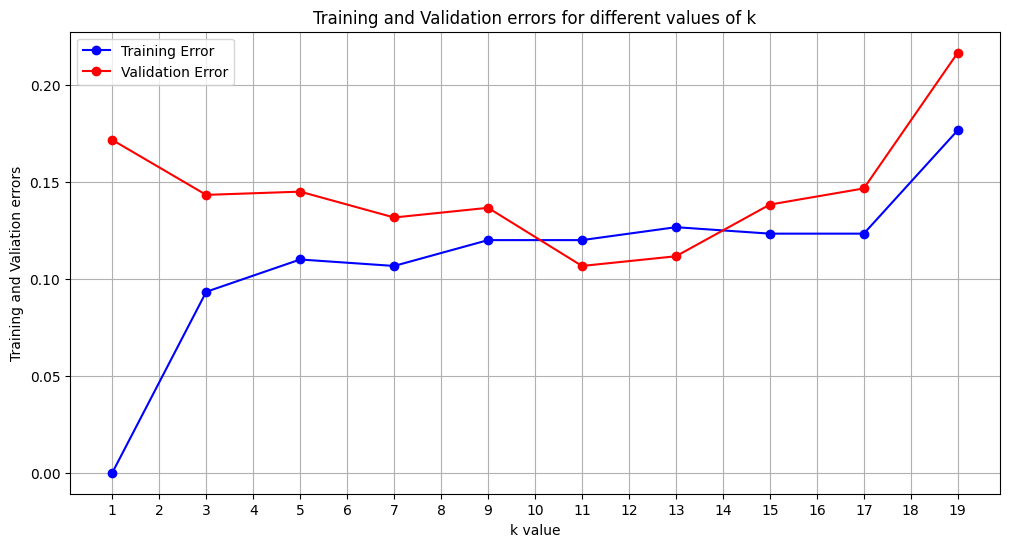

400
Best k: 9
Maximum accuracy on best k: 0.6183333333333334


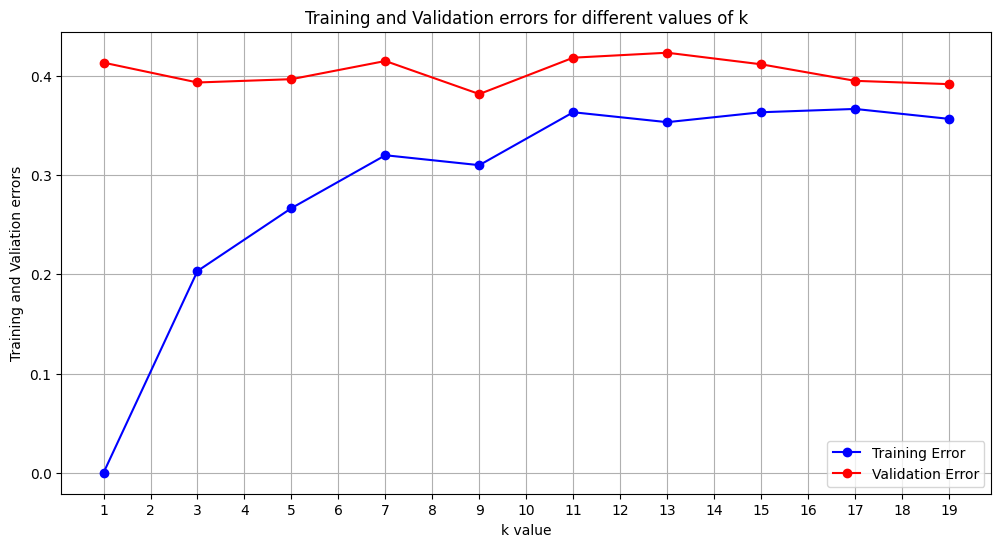

600
Best k: 19
Maximum accuracy on best k: 0.645


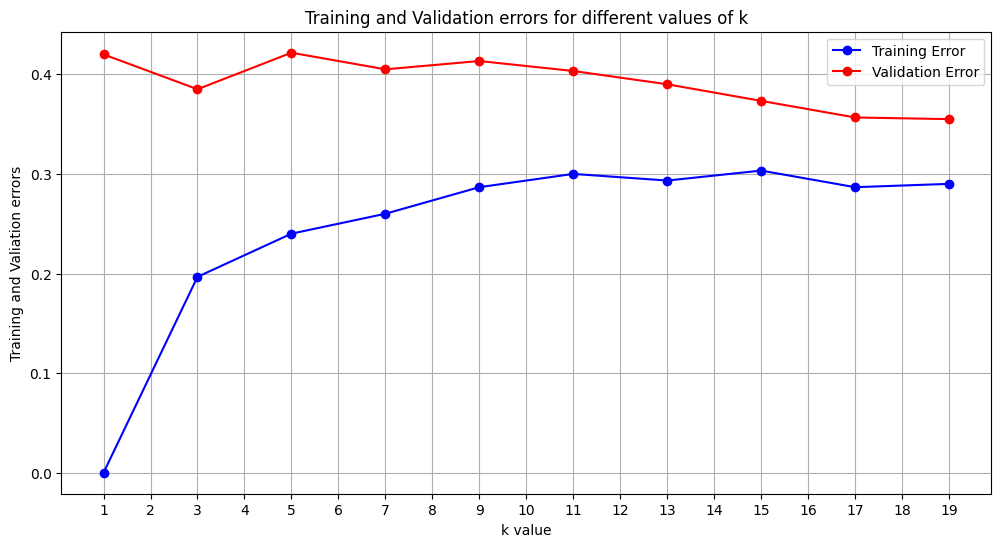

800
Best k: 3
Maximum accuracy on best k: 0.6716666666666666


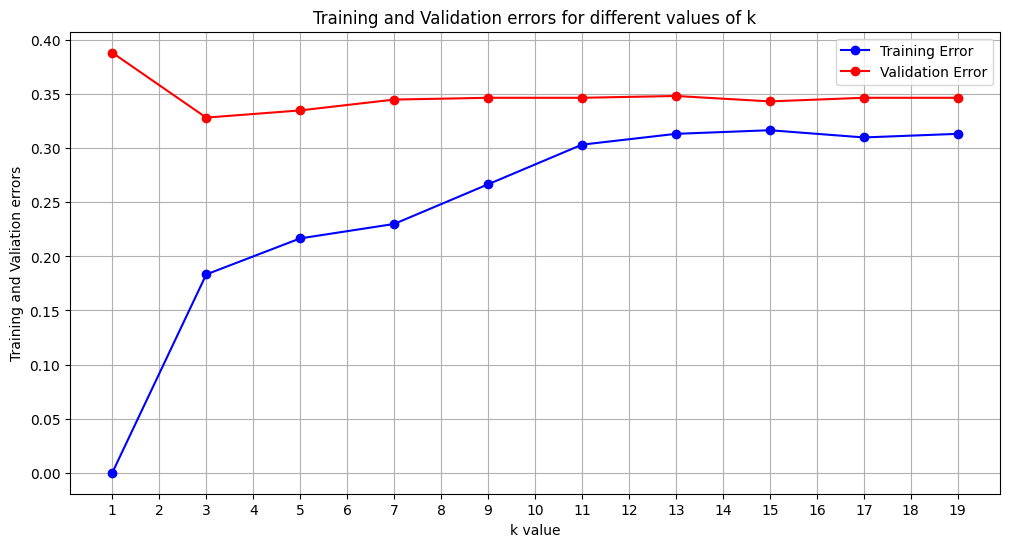

1000
Best k: 19
Maximum accuracy on best k: 0.63


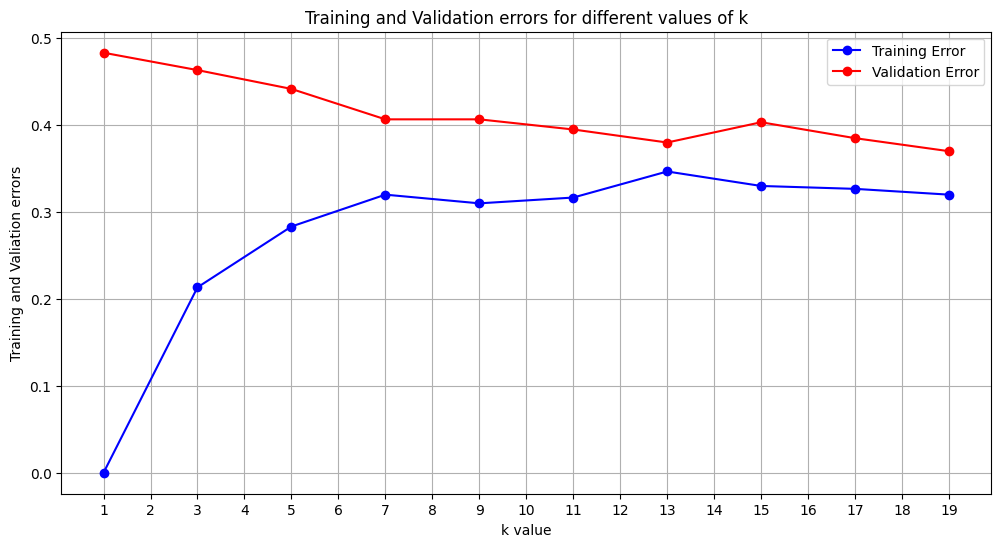

1200
Best k: 11
Maximum accuracy on best k: 0.6366666666666666


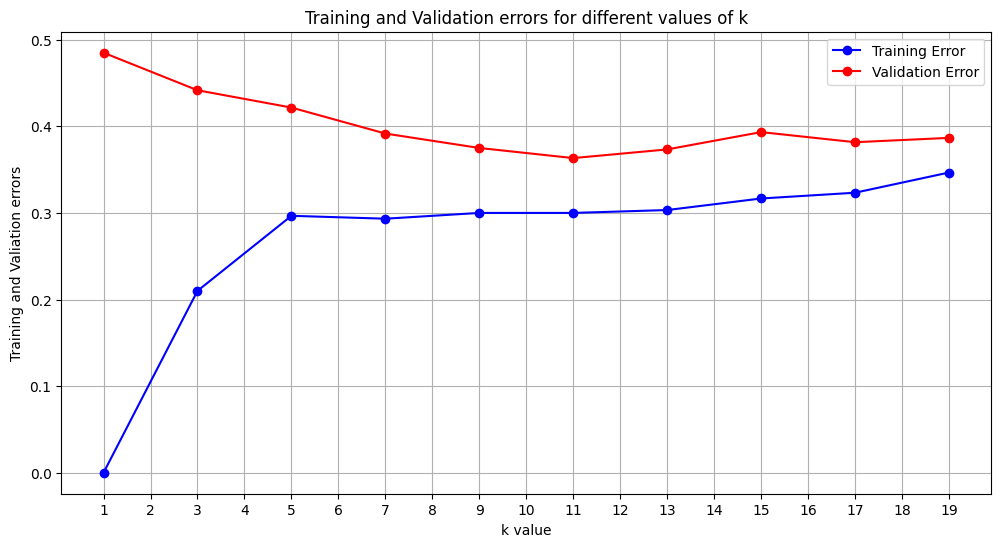

Distance-metric: L2
Gaussian Accuracy: 0.8656716417910447


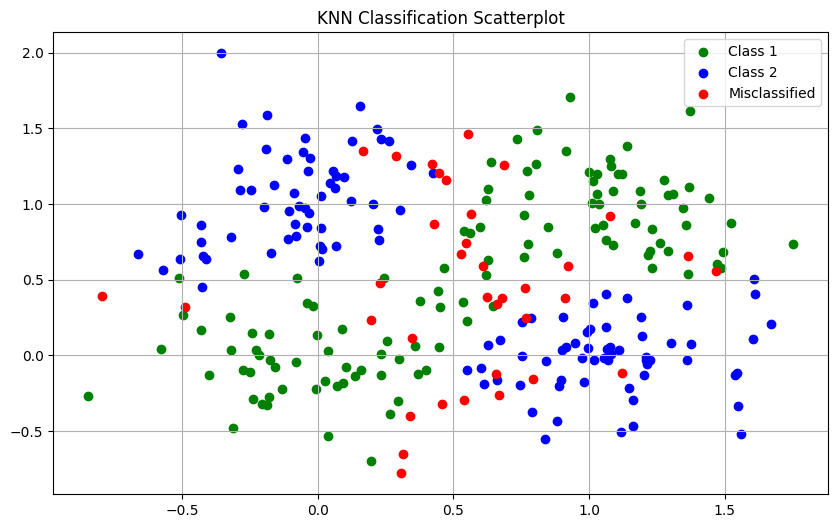

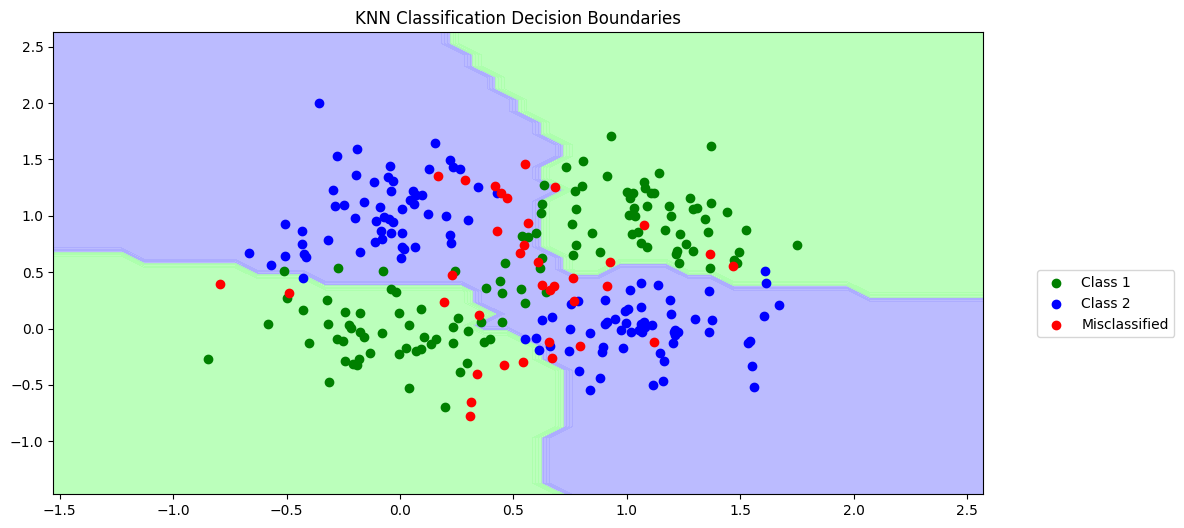

Distance-metric: L2
Laplacian Accuracy: 0.7947761194029851


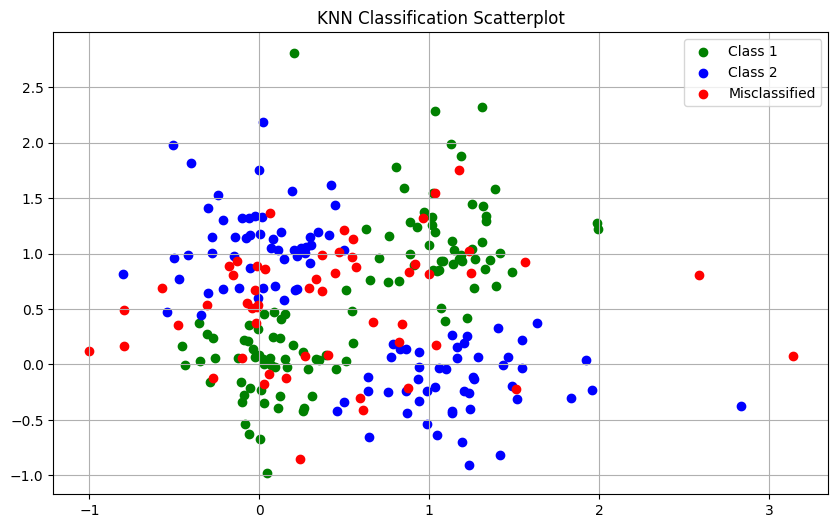

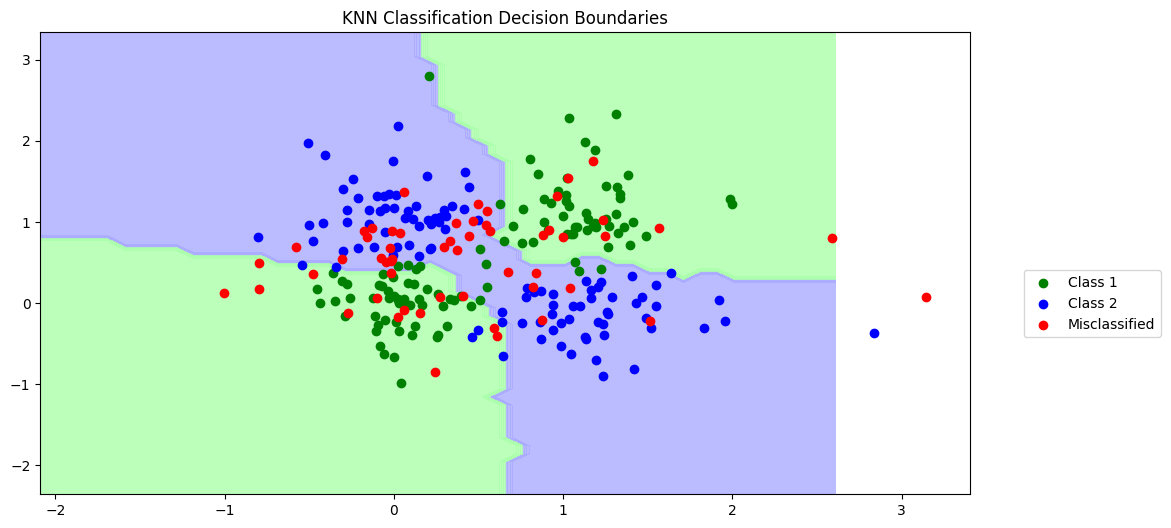

Distance Metric: L1
Gaussian Accuracy: 0.832089552238806


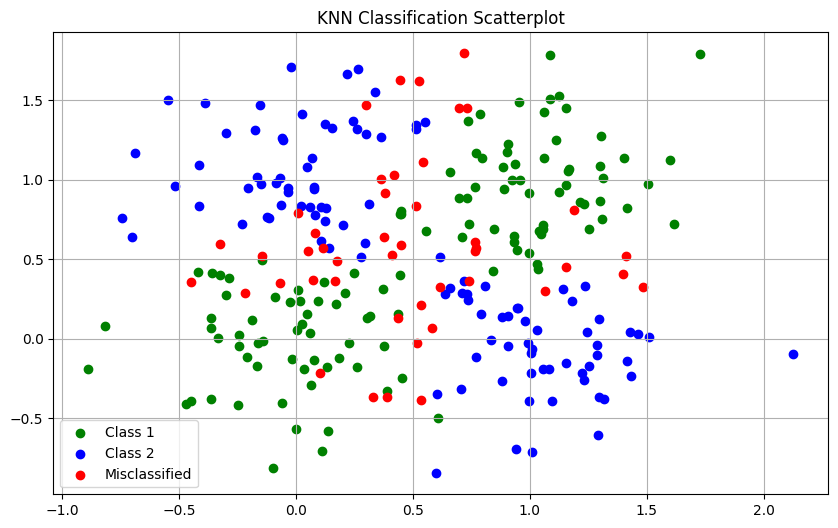

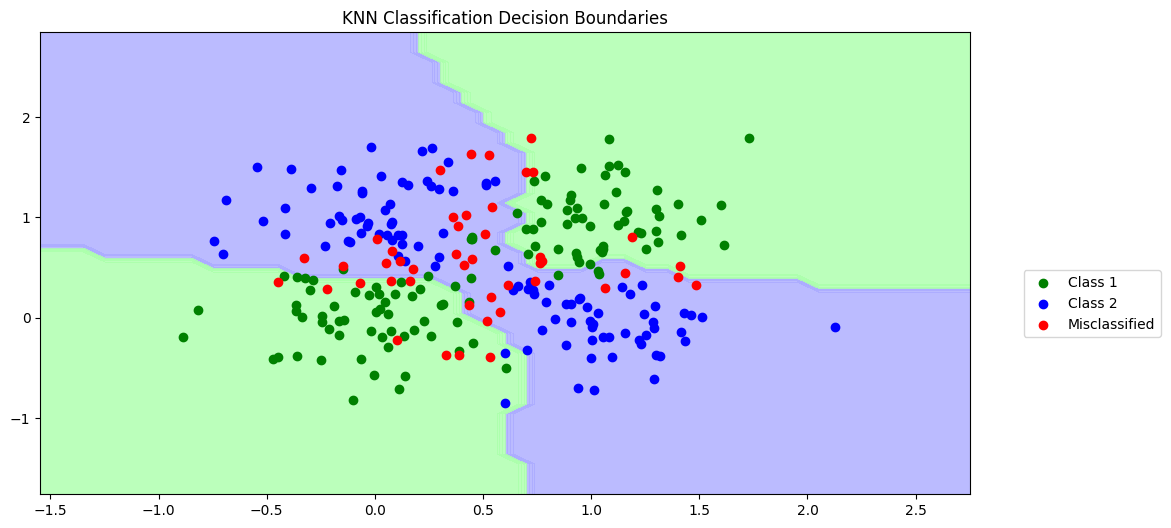

Distance Metric: L1
Laplacian Accuracy: 0.7947761194029851


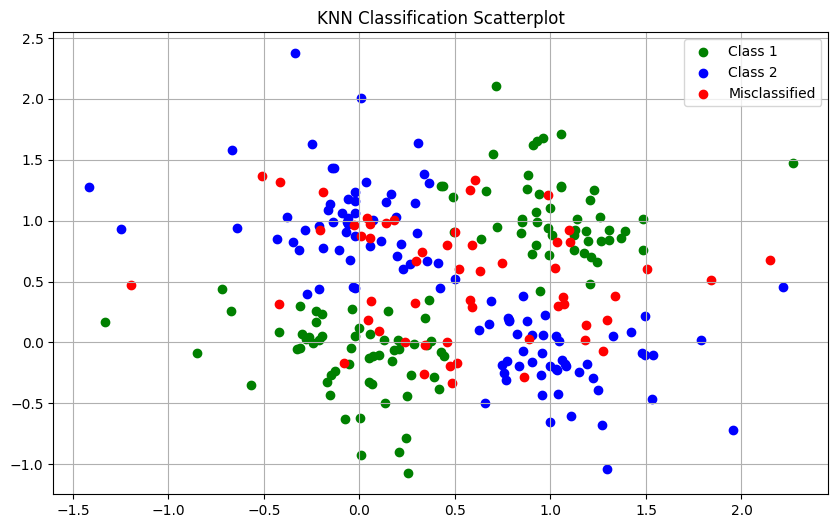

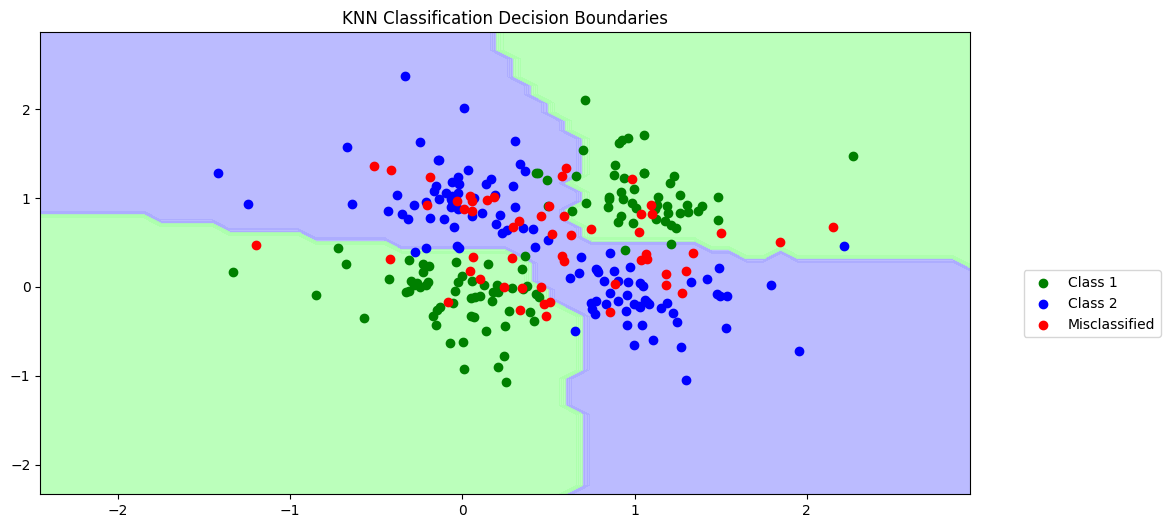

In [5]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases

def large_data_gen_gaussian(train_samples_count):
    # #Define means and covariances
    mean1 = np.array([0, 0])
    mean2 = np.array([0, 1])
    mean3 = np.array([1, 0])
    mean4 = np.array([1, 1])
    cov = np.array([[0.1, 0], [0, 0.1]])

    # Generate training data (30 samples per class)
    train_samples_large_1 = np.random.multivariate_normal(mean1, cov, int(train_samples_count/4))
    train_samples_large_2 = np.random.multivariate_normal(mean2, cov, int(train_samples_count/4))
    train_samples_large_3 = np.random.multivariate_normal(mean3, cov, int(train_samples_count/4))
    train_samples_large_4 = np.random.multivariate_normal(mean4, cov, int(train_samples_count/4))

    test_samples_large_1 = np.random.multivariate_normal(mean1, cov, int(3*train_samples_count/4))
    test_samples_large_2 = np.random.multivariate_normal(mean2, cov, int(3*train_samples_count/4))
    test_samples_large_3 = np.random.multivariate_normal(mean3, cov, int(3*train_samples_count/4))
    test_samples_large_4 = np.random.multivariate_normal(mean4, cov, int(3*train_samples_count/4))

    X_train_large = np.concatenate((train_samples_large_2, train_samples_large_3, train_samples_large_1, train_samples_large_4), axis=0)

    X_test_large = np.concatenate((test_samples_large_2, test_samples_large_3, test_samples_large_1, test_samples_large_4), axis=0)

    Y_train_large = np.concatenate((-np.ones(int(train_samples_count/4)), -np.ones(int(train_samples_count/4)), np.ones(int(train_samples_count/4)), np.ones(int(train_samples_count/4)),), axis=0)

    Y_test_large = np.concatenate((-np.ones(int(3*train_samples_count/4)), -np.ones(int(3*train_samples_count/4)), np.ones(int(3*train_samples_count/4)), np.ones(int(3*train_samples_count/4)),), axis=0)

    return X_train_large, Y_train_large, X_test_large, Y_test_large


n_values = [200,400,600,800,1000,1200]

k_range = range(1, 21, 2)
rho = 0.3
no_of_iterations = 10

for n in n_values:
    print(n)
    X_train_large, Y_train_large, X_test_large, Y_test_large = large_data_gen_gaussian(n)
    validation_errors_large, training_errors_large = holdoutCVkNN(k_range, rho, no_of_iterations, X_train_large, Y_train)

    avg_errors_validation = {k: np.mean(validation_errors_large[k]) for k in k_range}
    avg_errors_training = {k: np.mean(training_errors_large[k]) for k in k_range}

    avg_errors_validation = np.array(list(avg_errors_validation.values()))
    avg_errors_training = np.array(list(avg_errors_training.values()))

    best_k_large = k_range[np.argmin(avg_errors_validation)]
    print(f"Best k: {best_k_large}")
    Maximum_accuracy_on_best_k_large = 1 - np.min(avg_errors_validation)
    print(f"Maximum accuracy on best k: {Maximum_accuracy_on_best_k_large}")

    #print(avg_errors_validation)
    #print(avg_errors_training)

    plt.figure(figsize=(12,6))

    plt.plot(k_range, avg_errors_training, 'bo-', label='Training Error')  # blue line with circles
    plt.plot(k_range, avg_errors_validation, 'ro-', label='Validation Error')  # red line with circles

    plt.xlabel('k value')
    plt.ylabel('Training and Valiation errors')
    plt.title('Training and Validation errors for different values of k')
    plt.legend()
    plt.grid(True)

    plt.xticks(range(min(k_range), max(k_range) + 1, 1))  # x-axis ticks
    #plt.yticks(range(0, int(max(max(avg_errors_training), max(avg_errors_validation))) + 2, 1))  # y-axis ticks

    plt.show()



#Performance evaluation with different data distributions, i.e., Gaussian, Laplacian

from scipy.special import erf

def generate_multivariate_laplacian(mean, cov, size):
    # Generate samples from a multivariate Gaussian distribution
    normal_samples = np.random.multivariate_normal(mean, cov, size)

    # Transform to Laplace distribution while preserving covariance structure
    # Using the probability integral transformation method
    uniform_samples = 0.5 * (1 + erf((normal_samples - mean) / np.sqrt(2 * np.diag(cov))))
    laplacian_samples = mean + np.sign(uniform_samples - 0.5) * (-np.log(1 - 2*np.abs(uniform_samples - 0.5))) * np.sqrt(np.diag(cov))

    return laplacian_samples



def large_data_gen_laplacian(train_samples_count):
    mean1 = np.array([0, 0])
    mean2 = np.array([0, 1])
    mean3 = np.array([1, 0])
    mean4 = np.array([1, 1])
    cov = np.array([[0.1, 0], [0, 0.1]])

    laplacian_samples_1_train = generate_multivariate_laplacian(mean1, cov, int(train_samples_count/4))
    laplacian_samples_2_train = generate_multivariate_laplacian(mean2, cov, int(train_samples_count/4))
    laplacian_samples_3_train = generate_multivariate_laplacian(mean3, cov, int(train_samples_count/4))
    laplacian_samples_4_train = generate_multivariate_laplacian(mean4, cov, int(train_samples_count/4))

    laplacian_samples_1_test = generate_multivariate_laplacian(mean1, cov, int(3*train_samples_count/4))
    laplacian_samples_2_test = generate_multivariate_laplacian(mean2, cov, int(3*train_samples_count/4))
    laplacian_samples_3_test = generate_multivariate_laplacian(mean3, cov, int(3*train_samples_count/4))
    laplacian_samples_4_test = generate_multivariate_laplacian(mean4, cov, int(3*train_samples_count/4))

    X_train_large_laplacian = np.concatenate((laplacian_samples_2_train, laplacian_samples_3_train, laplacian_samples_1_train, laplacian_samples_4_train), axis=0)
    X_test_large_laplacian = np.concatenate((laplacian_samples_2_test, laplacian_samples_3_test, laplacian_samples_1_test, laplacian_samples_4_test), axis=0)

    Y_train_large_laplacian = np.concatenate((-np.ones(int(train_samples_count/4)), -np.ones(int(train_samples_count/4)), np.ones(int(train_samples_count/4)), np.ones(int(train_samples_count/4)),), axis=0)
    Y_test_large_laplacian = np.concatenate((-np.ones(int(3*train_samples_count/4)), -np.ones(int(3*train_samples_count/4)), np.ones(int(3*train_samples_count/4)), np.ones(int(3*train_samples_count/4)),), axis=0)

    return X_train_large_laplacian, Y_train_large_laplacian, X_test_large_laplacian, Y_test_large_laplacian


n_values_testing = [200,400,600,800,1000,1200]
n_value_part_a = [90]

for n in n_value_part_a:

    X_train_large , Y_train_large, X_test_large, Y_test_large = large_data_gen_gaussian(n)
    X_train_large_laplacian, Y_train_large_laplacian, X_test_large_laplacian, Y_test_large_laplacian = large_data_gen_laplacian(n)

    print(f"Distance-metric: L2")
    classif_gaussian = KNeighborsClassifier(5,distance_metric="l2")
    classif_gaussian.fit(X_train_large,Y_train_large)
    predictions_gaussian = classif_gaussian.predict(X_test_large)

    KNNAccuracy_gaussian = KNNAccuracy(Y_test_large,predictions_gaussian)


    classif_laplacian = KNeighborsClassifier(5,distance_metric="l2")
    classif_laplacian.fit(X_train_large_laplacian,Y_train_large_laplacian)
    predictions_laplacian = classif_laplacian.predict(X_test_large_laplacian)

    KNNAccuracy_laplacian = KNNAccuracy(Y_test_large_laplacian,predictions_laplacian)

    #print(n)
    print("Gaussian Accuracy:", KNNAccuracy_gaussian)
    plot_predictions(X_test_large,Y_test_large,predictions_gaussian)
    decision_boundaries(X_train_large,Y_train_large,X_test_large,Y_test_large,predictions_gaussian)
    print(f"Distance-metric: L2")
    #print(n)
    print("Laplacian Accuracy:", KNNAccuracy_laplacian)
    plot_predictions(X_test_large_laplacian,Y_test_large_laplacian,predictions_laplacian)
    decision_boundaries(X_train_large_laplacian,Y_train_large_laplacian,X_test_large_laplacian,Y_test_large_laplacian,predictions_laplacian)


for n in n_value_part_a:

    X_train_large , Y_train_large, X_test_large, Y_test_large = large_data_gen_gaussian(n)
    X_train_large_laplacian, Y_train_large_laplacian, X_test_large_laplacian, Y_test_large_laplacian = large_data_gen_laplacian(n)


    classif_gaussian = KNeighborsClassifier(5,distance_metric="l1")
    classif_gaussian.fit(X_train_large,Y_train_large)
    predictions_gaussian = classif_gaussian.predict(X_test_large)

    KNNAccuracy_gaussian = KNNAccuracy(Y_test_large,predictions_gaussian)

    print(f"Distance Metric: L1")
    classif_laplacian = KNeighborsClassifier(5,distance_metric="l1")
    classif_laplacian.fit(X_train_large_laplacian,Y_train_large_laplacian)
    predictions_laplacian = classif_laplacian.predict(X_test_large_laplacian)

    KNNAccuracy_laplacian = KNNAccuracy(Y_test_large_laplacian,predictions_laplacian)

    #print(n)
    print("Gaussian Accuracy:", KNNAccuracy_gaussian)
    plot_predictions(X_test_large,Y_test_large,predictions_gaussian)
    decision_boundaries(X_train_large,Y_train_large,X_test_large,Y_test_large,predictions_gaussian)
    print(f"Distance Metric: L1")
    #print(n)
    print("Laplacian Accuracy:", KNNAccuracy_laplacian)
    plot_predictions(X_test_large_laplacian,Y_test_large_laplacian,predictions_laplacian)
    decision_boundaries(X_train_large_laplacian,Y_train_large_laplacian,X_test_large_laplacian,Y_test_large_laplacian,predictions_laplacian)


Distance Metric: L2
Accuracy: 0.8566666666666667


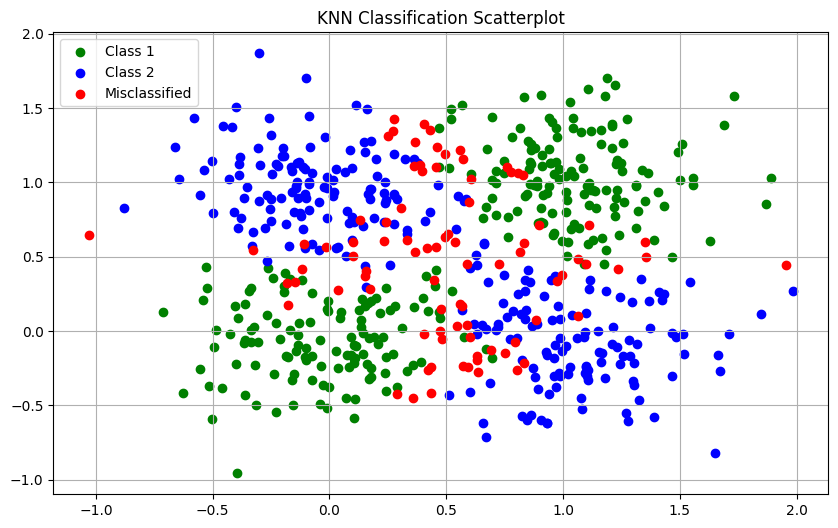

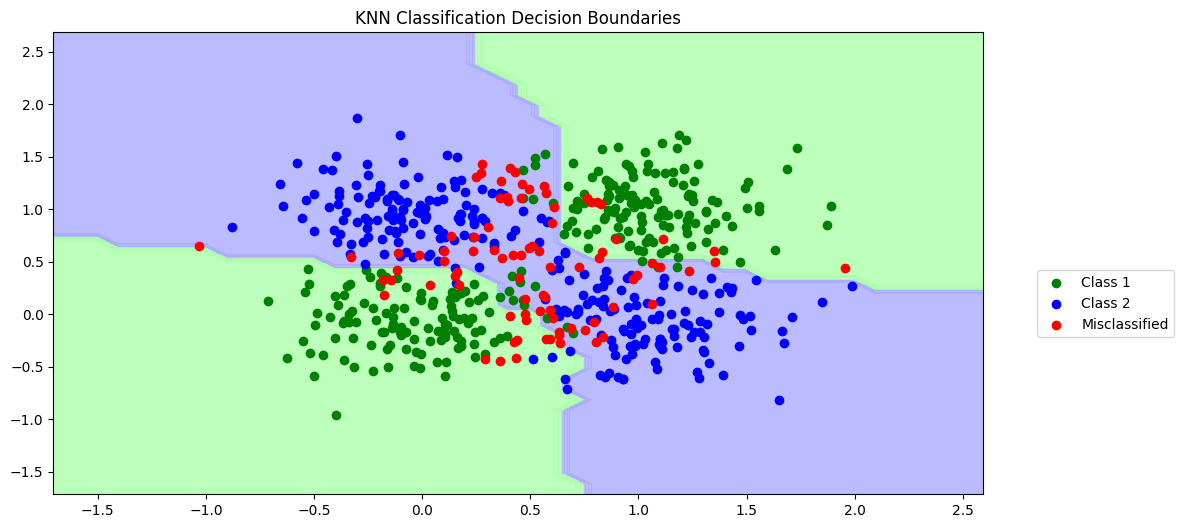

Distance Metric: L1
Accuracy: 0.8566666666666667


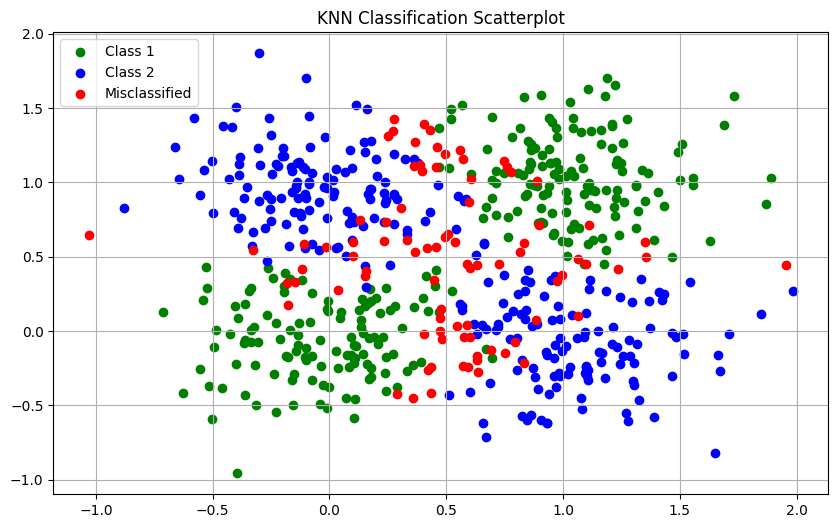

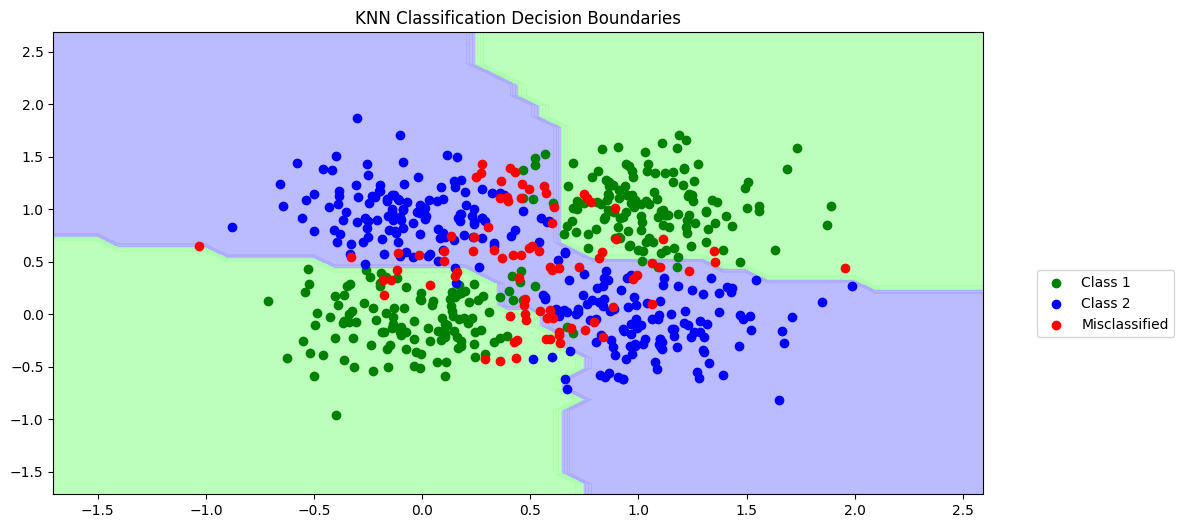

Distance Metric: Chebyshev
Accuracy: 0.8566666666666667


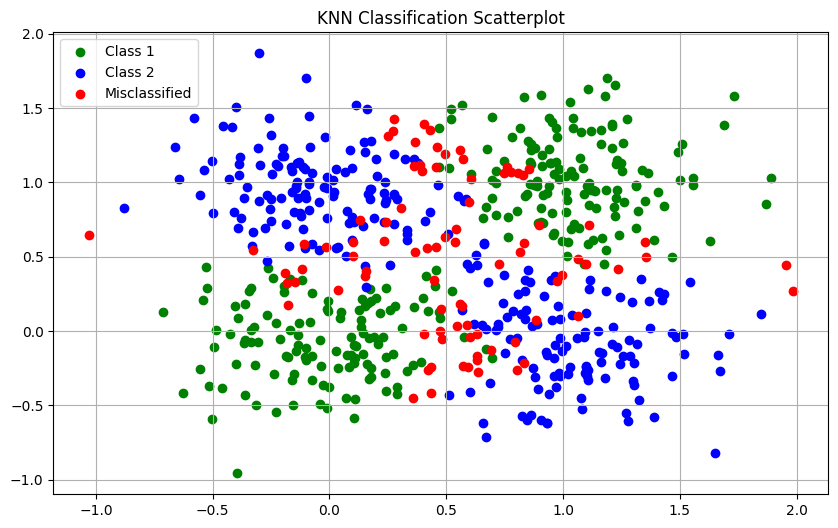

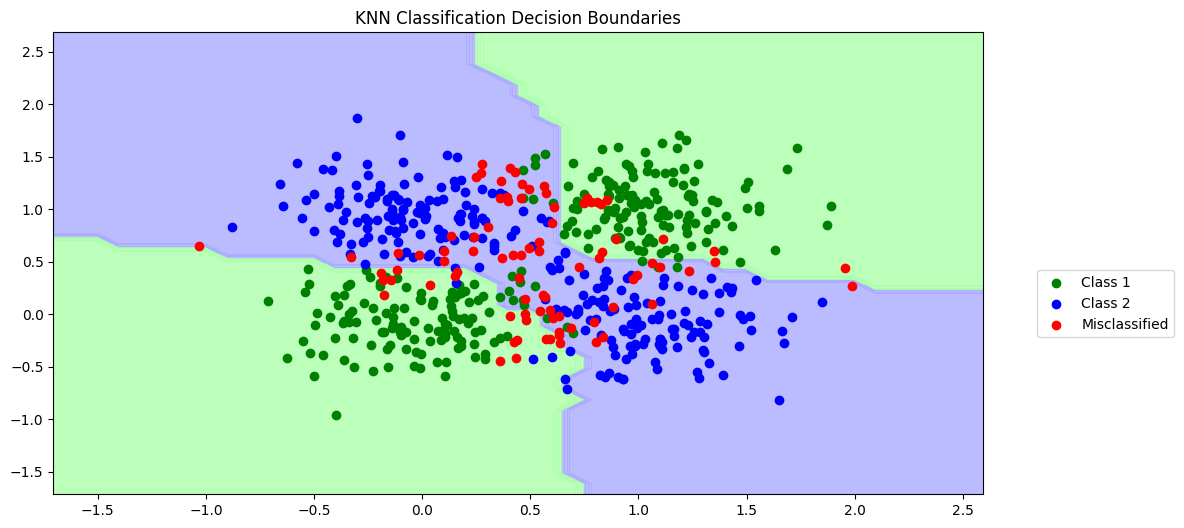

In [6]:
##################################
#Part(e): Influence of distance metric on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance metric

n_value_part_e = [200]

for n in n_value_part_e:
    X_train_large , Y_train_large, X_test_large, Y_test_large = large_data_gen_gaussian(n)
    classif_gaussian_l2 = KNeighborsClassifier(5,distance_metric="l2")
    classif_gaussian_l2.fit(X_train_large,Y_train_large)
    predictions_gaussian_l2 = classif_gaussian_l2.predict(X_test_large)

    KNNAccuracy_gaussian_l2 = KNNAccuracy(Y_test_large,predictions_gaussian_l2)

    classif_gaussian_l1 = KNeighborsClassifier(5,distance_metric="l1")
    classif_gaussian_l1.fit(X_train_large,Y_train_large)
    predictions_gaussian_l1 = classif_gaussian_l1.predict(X_test_large)

    KNNAccuracy_gaussian_l1 = KNNAccuracy(Y_test_large,predictions_gaussian_l1)

    classif_gaussian_chebyshev = KNeighborsClassifier(5,distance_metric="chebyshev")
    classif_gaussian_chebyshev.fit(X_train_large,Y_train_large)
    predictions_gaussian_chebyshev = classif_gaussian_chebyshev.predict(X_test_large)

    KNNAccuracy_gaussian_chebyshev = KNNAccuracy(Y_test_large,predictions_gaussian_chebyshev)


#Understand the decision regions of KNN classifier with different distance metric

    print(f"Distance Metric: L2")
    #print(n)
    print("Accuracy:", KNNAccuracy_gaussian_l2)
    plot_predictions(X_test_large,Y_test_large,predictions_gaussian_l2)
    decision_boundaries(X_train_large,Y_train_large,X_test_large,Y_test_large,predictions_gaussian_l2)
    print(f"Distance Metric: L1")
    #print(n)
    print("Accuracy:", KNNAccuracy_gaussian_l1)
    plot_predictions(X_test_large,Y_test_large,predictions_gaussian_l1)
    decision_boundaries(X_train_large,Y_train_large,X_test_large,Y_test_large,predictions_gaussian_l1)

    print(f"Distance Metric: Chebyshev")
    #print(n)
    print("Accuracy:", KNNAccuracy_gaussian_chebyshev)
    plot_predictions(X_test_large,Y_test_large,predictions_gaussian_chebyshev)
    decision_boundaries(X_train_large,Y_train_large,X_test_large,Y_test_large,predictions_gaussian_chebyshev)










### Part (f): MNIST Digit Classification using KNN Classifier

In the following part (f), the code implementation is slightly deviated from the original intention.

I wrote the `holdoutCVkNN` function for the MNIST database, and we can use this function to find the best `k`. However, for time concerns, I used `k = 15` and the distance metric as L2. With this configuration, I tested the model with the test data after it was trained on the training data. The following results are from this case.

If we need to check or get the results faster, we can do the following:

- Uncomment the `holdoutCVkNN` part and use the random indices generator to filter only fewer samples from the data, like 500 or 5000.

In the following version, the test data is just 1000 points chosen from the test data and tested with that. You can see the confusion matrix from this too when executed, and the result is also mentioned in the observations.


KNN accuracy with best k: 0.965


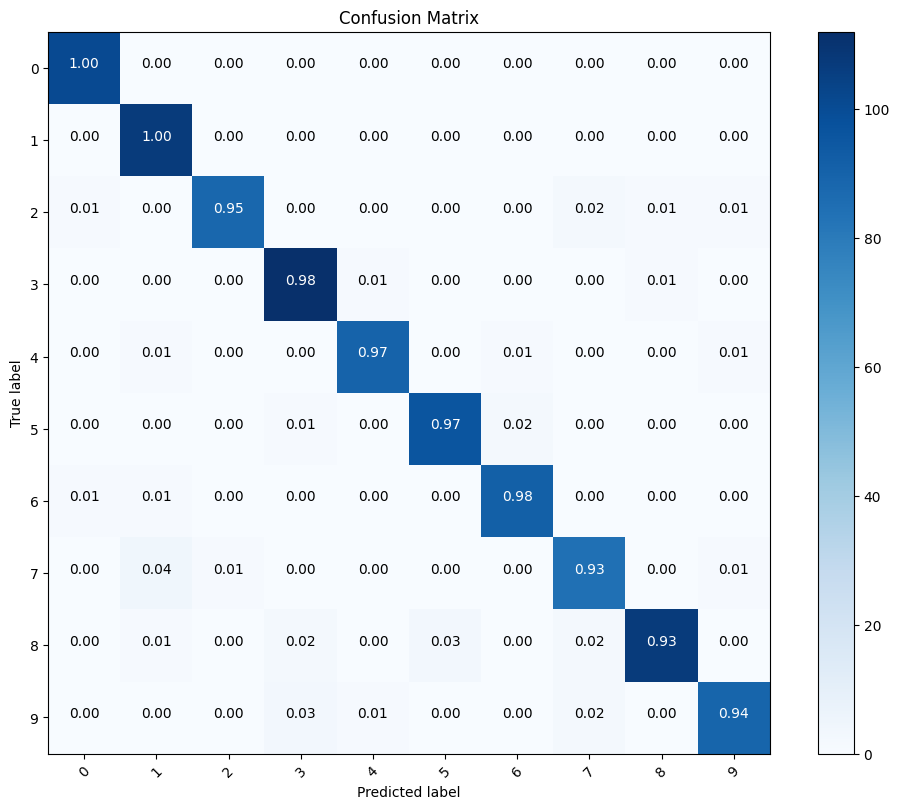

In [7]:
##################################
#Part(f): MNIST Digit classification using KNN classifier
###################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
# plt.subplot(211)
# plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
# plt.subplot(212)
# plt.imshow((images[1].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')

##Create train, validation and test splits

images = images / 255.0

total_no_of_images = len(images)

shuffled_indices = np.random.permutation(total_no_of_images)

images = images[shuffled_indices]
targets = targets[shuffled_indices]

training_images = images[:int(0.8*total_no_of_images)]
validation_images = images[int(0.8*total_no_of_images):int(0.9*total_no_of_images)]
test_images = images[int(0.9*total_no_of_images):]

training_targets = targets[:int(0.8*total_no_of_images)]
validation_targets = targets[int(0.8*total_no_of_images):int(0.9*total_no_of_images)]
test_targets = targets[int(0.9*total_no_of_images):]

#Write 'MultiClassKNNClassify' function

class  MultiClassKNeighborsClassifier:

    def __init__(self, n_neighbors,distance_metric="l2"):

        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None
        self.his = 0

    def fit(self,X_train,Y_train):
        self.X_train = np.array(training_images)
        self.y_train = np.array(training_targets)

    def distance(self, x1, x2):
        ## Calculate the distance between two points using the specified distance metric
        #self.his += 1

        if self.his % 500 == 0:
            self.his = 0

        if self.distance_metric == "l2":
            return np.linalg.norm(x1 - x2)

        elif self.distance_metric == "l1":
            return np.sum(np.abs(x1 - x2))

        elif self.distance_metric == "chebyshev":
            return np.max(np.abs(x1 - x2))

        else:
            raise ValueError("Unsupported distance metric")

    def predict_mnist(self, test_images):
        predictions = []
        for x in test_images:
            distances = np.array([self.distance(x, x_train) for x_train in self.X_train])
            nearest_neighbors = np.argsort(distances)[:self.n_neighbors]
            votes = self.y_train[nearest_neighbors]
            predicted_label = self.get_most_frequent_label(votes)
            predictions.append(predicted_label)
        return np.array(predictions)

    def get_most_frequent_label(self, votes):
        labels, counts = np.unique(votes, return_counts=True)
        most_frequent_label = labels[np.argmax(counts)]
        return most_frequent_label

    def multiKNNAccuracy(self, true, pred):
        accuracy = np.mean(true == pred)
        return accuracy


def holdoutCVMultiClassKNN(k_range, no_of_iterations, X_train, Y_train, X_test, Y_test):
    val_errors = {k: [] for k in k_range}
    train_errors = {k: [] for k in k_range}

    for i in range(1, no_of_iterations+1):

        for k in k_range:
            classif_cv_multi = MultiClassKNeighborsClassifier(k)
            classif_cv_multi.fit(X_train, Y_train)

            predictions_cv = classif_cv_multi.predict_mnist(X_test)
            accuracy_cv = classif_cv_multi.multiKNNAccuracy(Y_test, predictions_cv)
            error_perc_cv = 1 - accuracy_cv

            predictions_train = classif_cv_multi.predict_mnist(X_train)
            accuracy_train = classif_cv_multi.multiKNNAccuracy(Y_train, predictions_train)
            error_perc_train = 1 - accuracy_train

            val_errors[k].append(error_perc_cv)
            train_errors[k].append(error_perc_train)

    return val_errors, train_errors




#Empirically chose most suitable k and distance metric based on the evauation on cross-validation data

# Choose 500 random validation points out of 70,000 for cross validation

# random_indices_val = np.random.choice(500, size=500, replace=False)
# random_indices_train = np.random.choice(5000, size=5000, replace=False)


# k_range = range(1,21,2)
# no_of_iterations = 10
# validation_errors, training_errors = holdoutCVMultiClassKNN(k_range, no_of_iterations, training_images, training_targets, validation_images, validation_targets)

# avg_errors_validation = {k: np.mean(validation_errors[k]) for k in k_range}
# avg_errors_training = {k: np.mean(training_errors[k]) for k in k_range}

# avg_errors_validation = np.array(list(avg_errors_validation.values()))
# avg_errors_training = np.array(list(avg_errors_training.values()))

# best_k = k_range[np.argmin(avg_errors_validation)]
# print(f"Best k: {best_k}")

#Evaluate the performance on test data with the best hyper parameters ( k, distance metric ) obtained from cross validation

no_of_his = 0
classif_best_k_multi = MultiClassKNeighborsClassifier(n_neighbors=15,distance_metric="l2")
classif_best_k_multi.fit(training_images,training_targets)
predictions_best_k_multi = classif_best_k_multi.predict_mnist(test_images[:1000])

multi_KNN_accuracy_best_k = classif_best_k_multi.multiKNNAccuracy(test_targets[:1000],predictions_best_k_multi)
print("KNN accuracy with best k:", multi_KNN_accuracy_best_k)





def compute_confusion_matrix(true, pred):

    num_classes = len(np.unique(true))
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for t, p in zip(true, pred):
        confusion_matrix[int(t), int(p)] += 1  # Ensure indices are integers

    return confusion_matrix


confusion_matrix = compute_confusion_matrix(test_targets[:1000], predictions_best_k_multi)
#print("Confusion Matrix:\n", confusion_matrix)

def plot_confusion_matrix(confusion_matrix, class_names):
    plt.figure(figsize=(10, 8))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Normalize the confusion matrix
    confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    # Add text annotations
    thresh = confusion_matrix.max() / 2.
    for i, j in np.ndindex(confusion_matrix.shape):
        plt.text(j, i, format(confusion_matrix[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Class names for MNIST digits
class_names = [str(i) for i in range(10)]

# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix, class_names)

#Suggest an alternative ways to improve performance

# Some suggestions:
# 1. Normalize the data to have zero mean and unit variance.
# 2. Use different distance metrics and compare their performance.
# 3. Increase the number of training samples.




<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data


1. **Best Accuracy on Synthetic Test Data**:

   - The best accuracy on the synthetic test data generated from a Gaussian distribution is around **92.8%**.

2. **Best Accuracy on MNIST Data**:

   - The best accuracy on the MNIST validation data is **97.72%**.
   - The best accuracy on the MNIST test data is **96.68%**.

3. **Observations on the Confusion Matrix of KNN Classifier on MNIST Test Data**:

   - **High Accuracy**:

     - The KNN classifier achieved high accuracy on the MNIST test data subset. This indicates that the classifier is performing well in correctly identifying the digits.

   - **Diagonal Dominance**:
     - The confusion matrix is mostly diagonal, meaning that the majority of the predictions are correct. Each cell on the diagonal represents the number of times a particular digit was correctly classified.
     - The darker cells along the diagonal indicate higher values, showing that the classifier correctly predicted the majority of the test samples for each digit.
